## ARBOLES DE DECISIÓN

## MARÍA FERNANDA RUIZ GONZÁLEZ

## Programa: Ingenieria de Sistemas - Materia: Análisis de Datos - Grupo:1704

In [20]:
#Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [22]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
data.shape

(1599, 12)

In [26]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

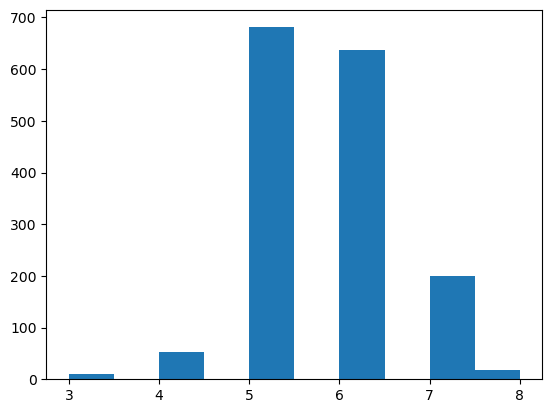

In [30]:
plt.hist(data.quality)

In [42]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [46]:
data.columns = data.columns.str.strip()

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

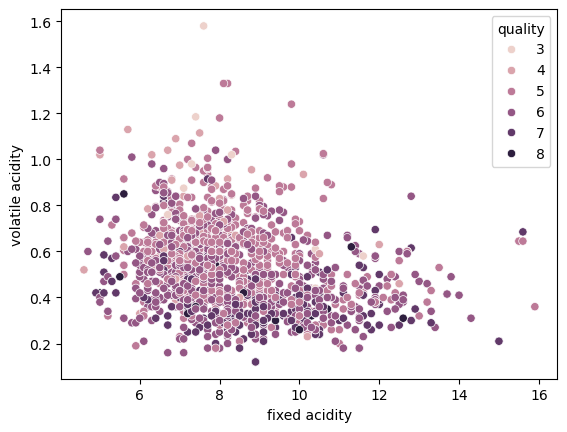

In [48]:
sns.scatterplot(x="fixed acidity", y="volatile acidity", hue="quality", data=data)

<Axes: xlabel='volatile acidity', ylabel='citric acid'>

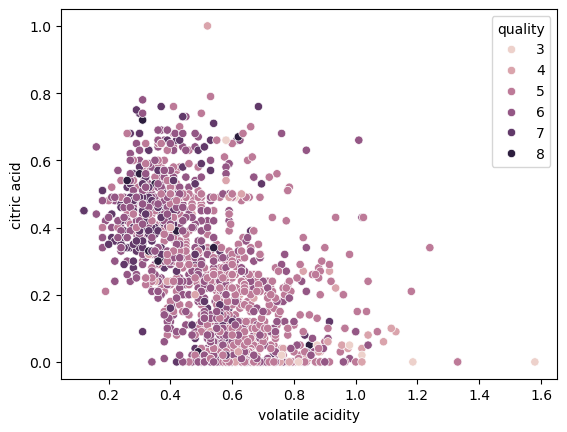

In [50]:
sns.scatterplot(x="volatile acidity", y="citric acid", hue="quality", data=data)

<Axes: xlabel='fixed acidity', ylabel='citric acid'>

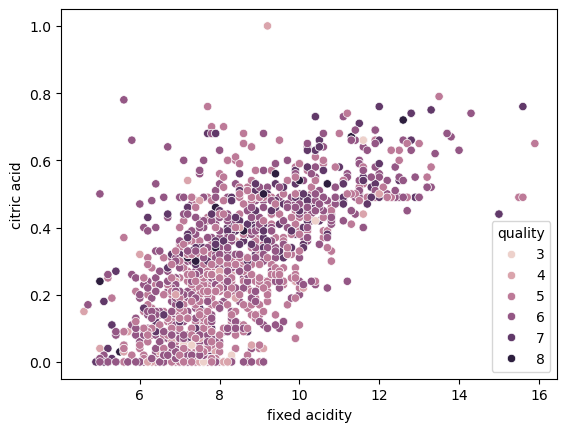

In [52]:
sns.scatterplot(x="fixed acidity", y="citric acid", hue="quality", data=data)

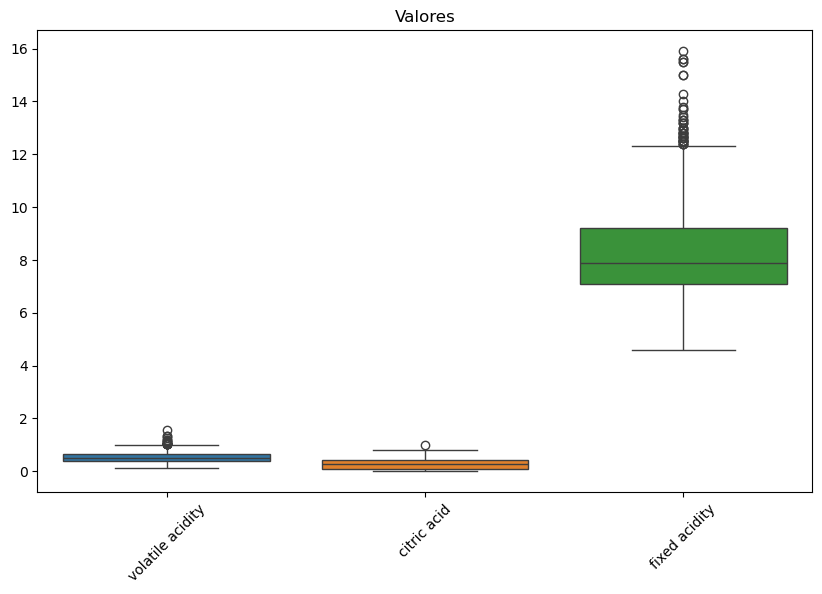

In [54]:
#Valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["volatile acidity", "citric acid", "fixed acidity"]])
plt.xticks(rotation=45)
plt.title("Valores")
plt.show()

In [62]:
predictors_col = ["volatile acidity", "citric acid", "fixed acidity"]
target_col = ["quality"]

In [64]:
predictors =data[predictors_col]
target = data[target_col]

In [66]:
predictors

,volatile acidity,citric acid,fixed acidity
0,0.700,0.00,7.4
1,0.880,0.00,7.8
2,0.760,0.04,7.8
3,0.280,0.56,11.2
4,0.700,0.00,7.4
...,...,...,...
1594,0.600,0.08,6.2
1595,0.550,0.10,5.9
1596,0.510,0.13,6.3
1597,0.645,0.12,5.9


In [68]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [70]:
corr = predictors.corr()
corr

,volatile acidity,citric acid,fixed acidity
volatile acidity,1.000000,-0.552496,-0.256131
citric acid,-0.552496,1.000000,0.671703
fixed acidity,-0.256131,0.671703,1.000000


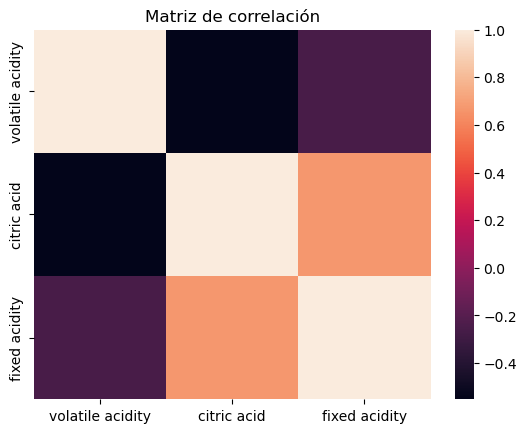

In [74]:
sns.heatmap(corr)
plt.title("Matriz de correlación")
plt.show()

In [78]:
x_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [80]:
tree= DecisionTreeClassifier()

In [84]:
arbol = tree.fit(x_train, y_train)

[Text(0.4861072591798703, 0.9791666666666666, 'x[0] <= 0.548\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.14458622162889423, 0.9375, 'x[0] <= 0.317\ngini = 0.649\nsamples = 699\nvalue = [1, 14, 210, 331, 133, 10]'),
 Text(0.31534674040438226, 0.9583333333333333, 'True  '),
 Text(0.04289510629763337, 0.8958333333333334, 'x[2] <= 8.05\ngini = 0.597\nsamples = 145\nvalue = [0, 1, 15, 73, 54, 2]'),
 Text(0.011766278914293354, 0.8541666666666666, 'x[0] <= 0.265\ngini = 0.485\nsamples = 37\nvalue = [0, 0, 4, 25, 8, 0]'),
 Text(0.004278646877924857, 0.8125, 'x[2] <= 6.0\ngini = 0.32\nsamples = 15\nvalue = [0, 0, 3, 12, 0, 0]'),
 Text(0.0021393234389624283, 0.7708333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.006417970316887284, 0.7708333333333334, 'x[1] <= 0.385\ngini = 0.245\nsamples = 14\nvalue = [0, 0, 2, 12, 0, 0]'),
 Text(0.004278646877924857, 0.7291666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0

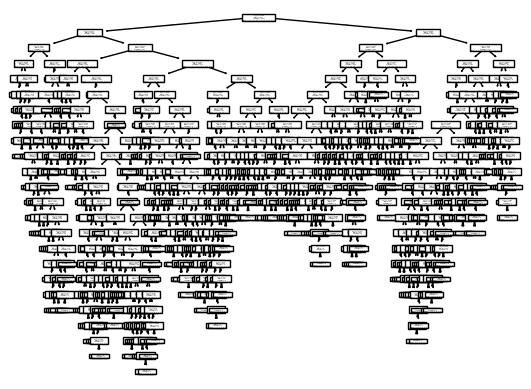

In [86]:
plot_tree(arbol)

In [88]:
predicciones = arbol.predict(X_test)

In [92]:
predicciones

array([5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 5, 5, 6,
       7, 5, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 7, 6, 6,
       5, 7, 6, 7, 6, 6, 5, 6, 7, 5, 7, 5, 6, 7, 7, 5, 5, 5, 5, 7, 7, 7,
       6, 4, 5, 6, 6, 5, 7, 6, 5, 6, 6, 5, 5, 5, 6, 7, 6, 5, 4, 5, 6, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 7,
       6, 6, 7, 5, 7, 5, 6, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       5, 7, 6, 5, 7, 5, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 7, 5, 5, 6, 6, 4,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 7, 6, 7, 6, 4, 6, 5, 5, 5, 6, 7, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 6, 6, 5, 5, 6, 4, 6,
       5, 4, 6, 7, 7, 6, 5, 6, 4, 5, 6, 6, 5, 7, 6, 6, 6, 5, 8, 5, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 7, 5, 7, 5, 6, 6, 5, 5,
       5, 6, 6, 7, 5, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 7, 6, 5, 4, 6, 6, 5, 5, 6, 4, 5, 5, 6, 5,

In [98]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=["Actual"], colnames=["predicciones"])

predicciones,4,5,6,7,8
Actual,,,,,
3,0,0,1,0,0
4,1,3,4,0,0
5,5,89,37,15,0
6,4,35,77,7,1
7,0,7,11,17,0
8,0,1,5,0,0


In [100]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.575

In [102]:
precision = precision_score(y_test, predicciones, average="weighted")
precision

C:\Users\maria\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.5719818376068375

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones, zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.10      0.12      0.11         8
           5       0.66      0.61      0.63       146
           6       0.57      0.62      0.59       124
           7       0.44      0.49      0.46        35
           8       0.00      0.00      0.00         6

    accuracy                           0.57       320
   macro avg       0.46      0.31      0.30       320
weighted avg       0.58      0.57      0.57       320



In [106]:
recall = recall_score(y_test, predicciones, average = "weighted")
recall

0.575

In [112]:
f1 = f1_score(y_test, predicciones, average="weighted")
f1

0.5724490170775758